# C-SPIKES: trialwise visualizations

This notebook demonstrates three notebook-friendly plotting utilities:
- `plot_corr_vs_sigma`: mean±SEM correlation vs filter width (`corr_sigma_ms`)
- `plot_trace_panel`: stacked fluorescence/GT/method trace panel for a representative trial
- `plot_raincloud_by_downsample`: raincloud distributions by downsample rate


In [1]:
from pathlib import Path
import os
import sys

def find_repo_root(start: Path) -> Path:
    for p in [start, *start.parents]:
        if (p / "pyproject.toml").exists() and (p / "src" / "c_spikes").exists():
            return p
    return start

# Ensure we can import the local package without installing.
REPO_ROOT = find_repo_root(Path.cwd().resolve())
sys.path.insert(0, str(REPO_ROOT / "src"))
os.chdir(REPO_ROOT)

# Make matplotlib cache writable (HPC-friendly). Call this before importing matplotlib.
from c_spikes.viz.trialwise_plots import ensure_matplotlib_cache_dir
ensure_matplotlib_cache_dir(REPO_ROOT / "tmp" / "mpl_cache")


PosixPath('/scratch/gpfs/WANG/gerardjb/temp/C-SPIKES/tmp/mpl_cache')

In [2]:
# Setting paths and models for jG8f
csv_path = REPO_ROOT / "results" / "trialwise_correlations_jG8f.csv"
eval_root= REPO_ROOT/ "results" / "full_evaluation_jG8f"
data_root= REPO_ROOT/ "data" / "janelia_8f" / "excitatory"
dataset="jGCaMP8f_ANM471994_cell05"

methods = [
        "pgas@base",
        "biophys_ml=ens2@updated_biophys-ml_cascade",
        "ens2=ens2@base",
        "cascade@updated_biophys-ml_cascade",
        "mlspike@matlab_mlspike",
]

# Sensor
sensor = "jGCaMP8f"

# And for some plot positions that worked well
corr_sigma_ms = 30.0
duration_s = 7
start_s = 465
ymax = 8

In [11]:
# Setting paths models
csv_path = REPO_ROOT / "results" / "trialwise_correlations_jG8m.csv"
eval_root= REPO_ROOT/ "results" / "full_evaluation"
data_root= REPO_ROOT/ "data" / "janelia_8m" / "excitatory"
dataset="jGCaMP8m_ANM472179_cell02"

methods = [
        "pgas@pgasraw",
        "biophys_ml=ens2@ens2_jG8m_sweep2_best_k2_r9_s2p0_d0p45_sb19000",
        "ens2=ens2@cascadein_nodisc_ens2",
        "cascade@cascade_updated_model",
        "mlspike@matlab_mlspike",
]

# Sensor
sensor = "jGCaMP8m"

# And for some plot positions that worked well
corr_sigma_ms = 30.0
duration_s = 7
start_s = 219
ymax = 8

(0.0, 110.0)

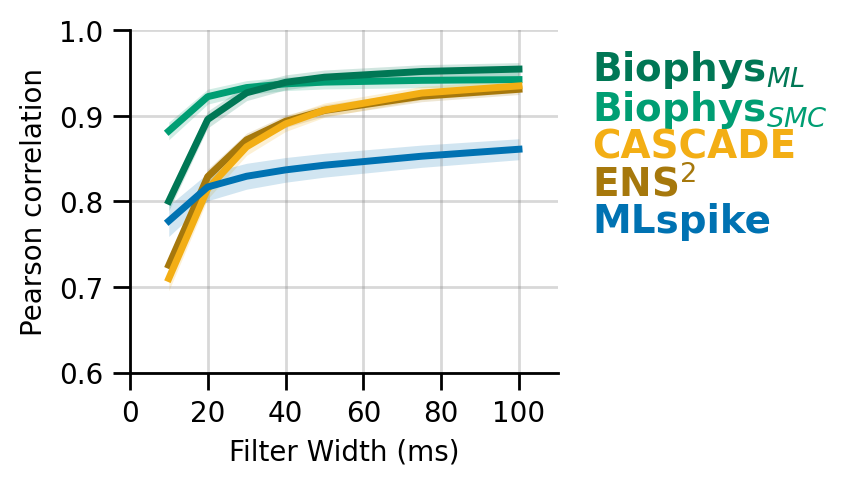

In [4]:
from c_spikes.viz.trialwise_plots import plot_corr_vs_sigma

# Edit filters here as needed.
fig_plot_corr, ax = plot_corr_vs_sigma(
    csv_path=csv_path,
    methods=methods,
    smoothings=["raw"],
    #reduce="dataset",
)

fig_plot_corr.set_size_inches(5, 2.5)
ax.set_ylim(0.6,1)
ax.set_xlim(0,110)


{'trial': 1,
 'window_start_s': 462.9021000000066,
 'window_end_s': 471.9021000000066,
 'method_corrs': {'pgas@base': 0.9357873491342176,
  'biophys_ml': 0.9021360833856074,
  'ens2': 0.8471903630504521,
  'cascade@updated_biophys-ml_cascade': 0.8214832701676478,
  'mlspike@matlab_mlspike': 0.7388446400243387},
 'snippet_corrs': None,
 'run_by_method': {'pgas@base': 'base',
  'biophys_ml': 'updated_biophys-ml_cascade',
  'ens2': 'base',
  'cascade@updated_biophys-ml_cascade': 'updated_biophys-ml_cascade',
  'mlspike@matlab_mlspike': 'matlab_mlspike'},
 'series': [{'key': 'pgas@base', 'method': 'pgas', 'run_tag': 'base'},
  {'key': 'biophys_ml',
   'method': 'ens2',
   'run_tag': 'updated_biophys-ml_cascade'},
  {'key': 'ens2', 'method': 'ens2', 'run_tag': 'base'},
  {'key': 'cascade@updated_biophys-ml_cascade',
   'method': 'cascade',
   'run_tag': 'updated_biophys-ml_cascade'},
  {'key': 'mlspike@matlab_mlspike',
   'method': 'mlspike',
   'run_tag': 'matlab_mlspike'}]}

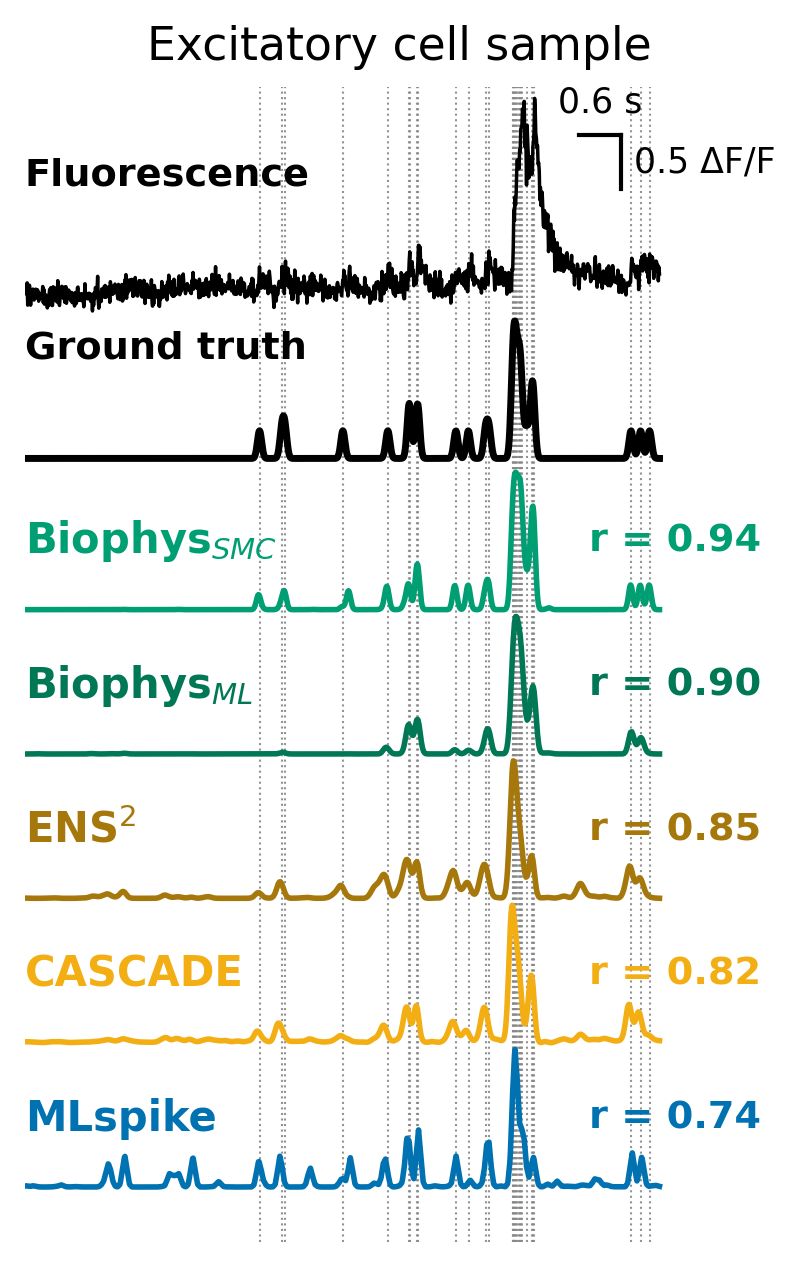

In [5]:
from c_spikes.viz.trialwise_plots import plot_trace_panel
smoothing = "raw"
fig_trace, ax, meta = plot_trace_panel(
    csv_path=csv_path,
    eval_root=eval_root,
    data_root=data_root,
    dataset=dataset,
    smoothing=smoothing,
    corr_sigma_ms=corr_sigma_ms,
    trial=1,
    duration_s = 9,#duration_s,
    start_s = start_s,
    ymax = ymax,
    methods=methods,
)
meta


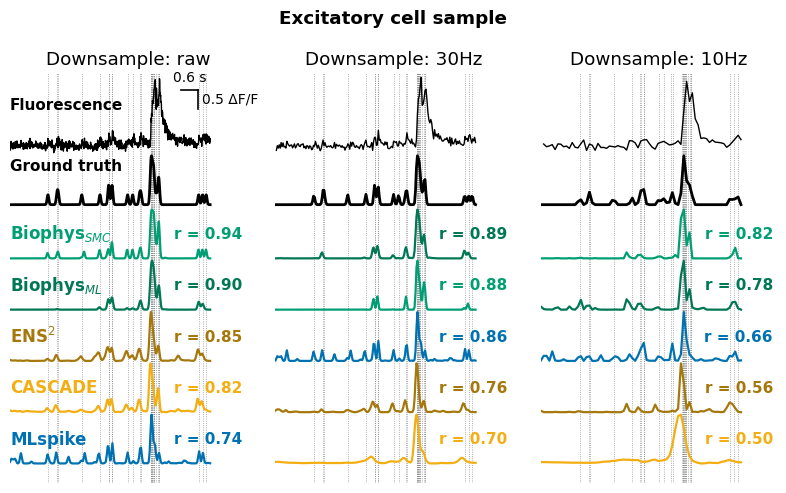

In [12]:
import matplotlib.pyplot as plt

smoothing_levels = ["raw", "30Hz", "10Hz"]
show_labels = [True,False,False]

fig_trace_panels, axes = plt.subplots(1, 3, figsize=(8, 5)) # Create 3-panel figure

for i, smoothing in enumerate(smoothing_levels):
    # Pass the specific axis for this panel into your function
    _, ax, meta = plot_trace_panel(
        csv_path=csv_path,
        eval_root=eval_root,
        data_root=data_root,
        dataset=dataset,
        smoothing=smoothing,
        corr_sigma_ms=corr_sigma_ms,
        duration_s = duration_s,
        trial =1,
        start_s = start_s,
        ymax = ymax,
        methods=methods,
        ax=axes[i],
        show_panel_labels=show_labels[i],
        show_method_labels=show_labels[i],
        show_scalebar=show_labels[i],
    )
    ax.set_title(f"Downsample: {smoothing}")
    meta

plt.suptitle("Excitatory cell sample",weight="bold")
plt.tight_layout()
plt.show()


[<Axes: title={'center': 'Trialwise correlations at 30.0 ms kernel'}, xlabel='Downsample rate', ylabel='Pearson correlation'>]


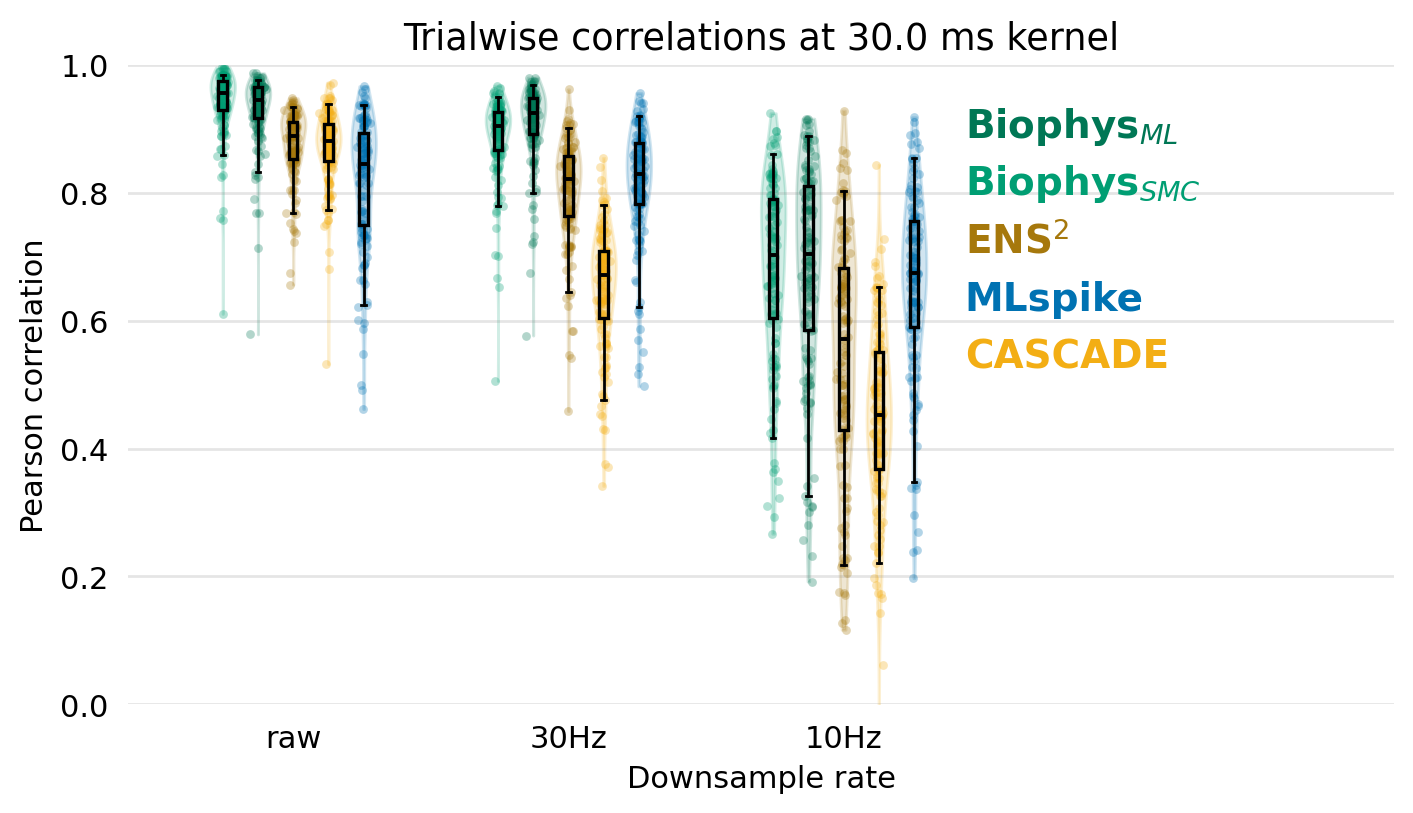

In [13]:
from c_spikes.viz.trialwise_plots import plot_raincloud_by_downsample
corr_sigma_ms = 30.0

fig_raincloud, axes = plot_raincloud_by_downsample(
    csv_path=csv_path,
    corr_sigma_ms=corr_sigma_ms,
    methods=methods,
    smoothings=["raw", "30Hz", "10Hz"],
    # Optional: restrict to a subset of dataset stems
    # datasets=["jGCaMP8m_ANM472179_cell02"],
    title=f"Trialwise correlations at {corr_sigma_ms} ms kernel",
    method_label_x_offset_frac=-0.05,
)
print(fig_raincloud.axes)


In [14]:
# Save figures (optional)
out_dir = REPO_ROOT / "results" / "plots"
out_dir.mkdir(parents=True, exist_ok=True)

corr_out = out_dir / f"trialwise_corr_vs_sigma_{sensor}.pdf"
trace_panel_out = out_dir / f"trialwise_trace_panels_{sensor}.pdf"
trace_single_out = out_dir / f"trialwise_trace_{sensor}.pdf"
rain_out = out_dir / f"trialwise_raincloud_{sensor}.pdf"


# {corr_out:fig_plot_corr, trace_single_out: fig_trace,trace_panel_out:fig_trace_panels}
out_dict = {corr_out:fig_plot_corr, trace_single_out: fig_trace,trace_panel_out:fig_trace_panels, rain_out:fig_raincloud}

# The last-created `fig` is the trace panel; re-run the correlation cell if you want both in one go.
for path, fig in out_dict.items():
    fig.savefig(path, dpi=300)
    print(f"Saved {path}")



Saved /scratch/gpfs/WANG/gerardjb/temp/C-SPIKES/results/plots/trialwise_corr_vs_sigma_jGCaMP8f.pdf
Saved /scratch/gpfs/WANG/gerardjb/temp/C-SPIKES/results/plots/trialwise_trace_jGCaMP8f.pdf
Saved /scratch/gpfs/WANG/gerardjb/temp/C-SPIKES/results/plots/trialwise_trace_panels_jGCaMP8f.pdf
Saved /scratch/gpfs/WANG/gerardjb/temp/C-SPIKES/results/plots/trialwise_raincloud_jGCaMP8f.pdf
